This is small decision tree to help brand new Pokemon trainers to decide on which Pokemon is best to start with based on stats and type.

Here are some insights you can get from this:

- Fire-type starters typically have higher Speed and Attack stats
- Water-type starters often have balanced stats with good Defense
- Grass-type starters usually have higher Special Defense and HP

Here is how to interpret the decision tree:
- Each node shows a decision based on a stat value
- The colors indicate which type is predicated at each leaf
- The deeper the tree, the more specific the classification
- The feature importance will show which stats are more crucial in determining type

Creation of the dataset

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


data = {'Name': [
        'Bulbasaur', 'Charmander', 'Squirtle',
        'Chikorita', 'Cyndaquil', 'Totodile',
        'Treecko', 'Torchic', 'Mudkip',
        'Turtwig', 'Chimchar', 'Piplup',
        'Snivy', 'Tepig', 'Oshawott',
        'Chespin', 'Fennekin', 'Froakie',
        'Rowlet', 'Litten', 'Popplio'
    ],
    'Type1': [
        'Grass', 'Fire', 'Water',
        'Grass', 'Fire', 'Water',
        'Grass', 'Fire', 'Water',
        'Grass', 'Fire', 'Water',
        'Grass', 'Fire', 'Water',
        'Grass', 'Fire', 'Water',
        'Grass', 'Fire', 'Water'
    ],
    'HP': [45, 39, 44, 45, 39, 50, 40, 45, 50, 55, 44, 53, 45, 65, 55, 56, 40, 41, 68, 45, 50],
    'Attack': [49, 52, 48, 49, 52, 65, 45, 60, 70, 68, 58, 51, 45, 63, 55, 61, 45, 56, 55, 65, 54],
    'Defense': [49, 43, 65, 65, 43, 64, 35, 40, 50, 64, 44, 53, 55, 45, 45, 65, 40, 40, 55, 40, 54],
    'Sp_Attack': [65, 60, 50, 49, 60, 44, 65, 70, 50, 45, 58, 61, 45, 45, 63, 48, 62, 62, 50, 60, 66],
    'Sp_Defense': [65, 50, 64, 65, 50, 48, 55, 50, 50, 55, 44, 56, 55, 45, 45, 48, 60, 40, 50, 40, 54],
    'Speed': [45, 65, 43, 45, 65, 43, 70, 45, 40, 31, 61, 40, 63, 45, 45, 38, 60, 71, 42, 70, 40]
}

df = pd.DataFrame(data)

View of sample size data

In [2]:
df = pd.DataFrame(data)
df.sample(10)

,Name,Type1,HP,Attack,Defense,Sp_Attack,Sp_Defense,Speed
11,Piplup,Water,53,51,53,61,56,40
20,Popplio,Water,50,54,54,66,54,40
15,Chespin,Grass,56,61,65,48,48,38
1,Charmander,Fire,39,52,43,60,50,65
0,Bulbasaur,Grass,45,49,49,65,65,45
5,Totodile,Water,50,65,64,44,48,43
19,Litten,Fire,45,65,40,60,40,70
13,Tepig,Fire,65,63,45,45,45,45
12,Snivy,Grass,45,45,55,45,55,63
4,Cyndaquil,Fire,39,52,43,60,50,65


Calculation of Total Stats

In [3]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp_Attack'] + df['Sp_Defense'] + df['Speed']

Creating Features (X) and Target (Y)

In [4]:
X = df[['HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed']]
Y = df['Type1']

Here I am creating and training the Decision Tree

In [5]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, Y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Creating a Visualization of the Decision Tree

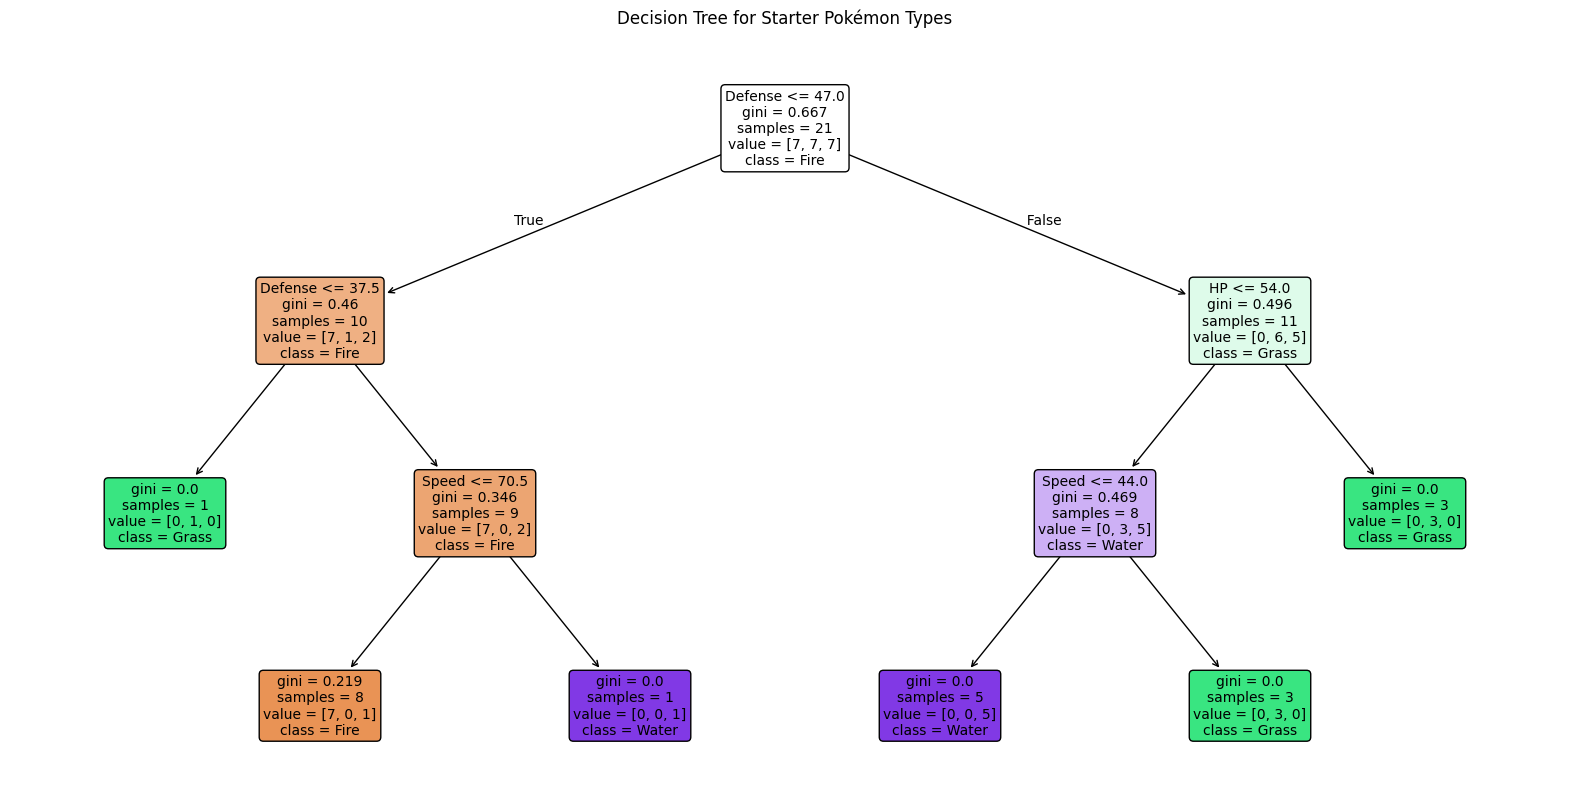

In [ ]:

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=sorted(Y.unique()),filled=True,rounded=True, fontsize=10)
plt.title("Decision Tree for Starter Pokémon Types")
plt.show()


Showing of feature importance and some insights about the Pokemon starters

In [7]:
feature_importance = pd. DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

print("\nStatistics by Type:")
print(df.groupby('Type1')['Total'].agg(['mean', 'min', 'max']))


Feature Importance:
      Feature  Importance
2     Defense    0.443620
5       Speed    0.417234
0          HP    0.139147
1      Attack    0.000000
3   Sp_Attack    0.000000
4  Sp_Defense    0.000000

Statistics by Type:
             mean  min  max
Type1                      
Fire   310.285714  307  320
Grass  315.428571  308  320
Water  312.571429  308  318
